# Завдання 1
Використовуючи дані із файлу student_scores.csv побудуйте модель простої регресії для знаходження залежності між значеннями протяжності навчання і середнього балу студентів. Оцініть якість отриманої регресії.

## Варіант 1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

student_df = pd.read_csv('student_scores.csv')
student_df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


<AxesSubplot: xlabel='Hours', ylabel='Scores'>

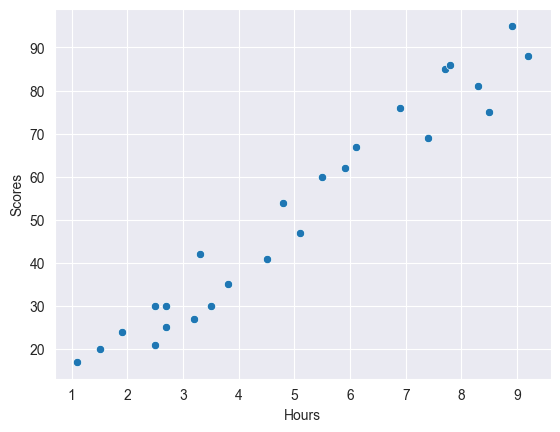

In [2]:
sns.scatterplot(student_df, x='Hours', y='Scores')

In [3]:
reg = LinearRegression()
reg.fit(student_df[['Hours']], student_df[['Scores']])

print(f'Рівняння регресії:\n Scores = {round(float(reg.intercept_), 2)} + {round(float(reg.coef_), 2)} * Hours')

Рівняння регресії:
 Scores = 2.48 + 9.78 * Hours


In [4]:
student_df['Scores fitted'] = reg.predict(student_df[['Hours']])
student_df['resid'] = student_df['Scores'] - student_df['Scores fitted']
student_df.head()

,Hours,Scores,Scores fitted,resid
0,2.5,21,26.923182,-5.923182
1,5.1,47,52.340271,-5.340271
2,3.2,27,33.766244,-6.766244
3,8.5,75,85.578002,-10.578002
4,3.5,30,36.698985,-6.698985


<AxesSubplot: xlabel='Hours', ylabel='Scores'>

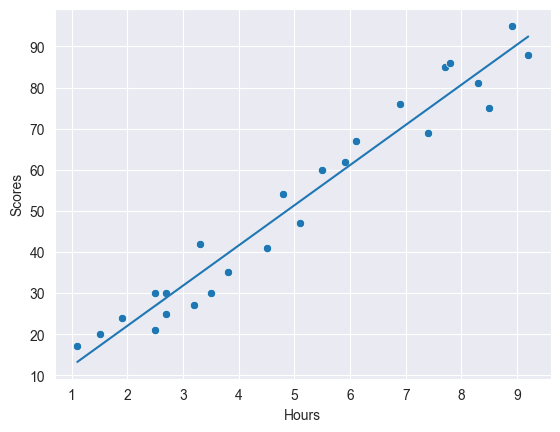

In [5]:
sns.scatterplot(student_df, x='Hours', y='Scores')
sns.lineplot(student_df, x='Hours', y='Scores fitted')

In [6]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred)
    mse=metrics.mean_squared_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    mape=metrics.mean_absolute_percentage_error(y_true, y_pred)*100

    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))
    print('MAPE: ', round(mape,4))

regression_results(student_df['Scores'], student_df['Scores fitted'])

r2:  0.9529
MAE:  4.9728
MSE:  28.8827
RMSE:  5.3743
MAPE:  11.8221


### Висновок: оскільки дані очевидно мають лінійну залежність, модель демонструє високу точність. Модель пояснює 95,3% варіації залежної змінної. Модель в середньому помиляється на 4.97 значення залежної змінної або на 11,82%

## Варіант 2
На мою думку, зручніший та інформативніший.

In [7]:
import statsmodels.formula.api as smf

sm_fit = smf.ols('Scores ~ Hours', data=student_df).fit()
sm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Wed, 15 Feb 2023   Prob (F-statistic):           9.13e-17
Time:                        01:24:45   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4837      2.532      0.981      0.337      -2.753       7.721
Hours          9.7758      0.453     21.583      0.000       8.839      10.713
==============================================================================
Omnibus:                        7.616   Durbin-Watson:                   1.460
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                2.137
Skew:                          -0.216   Prob(JB):                        0.343
Kurtosis:                       1.634   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""